# **RAMP on Heart Disease Prediction**

## **Introduction**

### **Heart Disease Prediction**
Cardiovascular diseases are among the leading causes of mortality worldwide. Accurate and early diagnosis of heart disease is crucial for effective treatment and prevention. The goal of this challenge is to build predictive models that can determine whether a patient has heart disease based on clinical and diagnostic features.

The target variable **y** is binary:
- **y = 1**: The patient has heart disease.
- **y = 0**: The patient does not have heart disease.

Automating this classification process could significantly aid healthcare professionals in making quick and reliable diagnoses.

---

## **Challenge Objective**
Participants will build machine learning models to classify patients as having heart disease or not, based on structured clinical data. The goal is to maximize classification performance while ensuring interpretability and clinical relevance.

---

## **Evaluation Metrics**
Models will be evaluated using the following metrics:
- **Accuracy**: Overall correctness of the predictions.
- **F1-score**: Balance between precision and recall, particularly important for imbalanced data.
- **ROC-AUC**: Measures the ability of the model to distinguish between classes.

---

## **Conclusion**
This challenge aims to encourage the development of reliable predictive models for heart disease diagnosis, leveraging structured clinical data. The resulting models could have real-world applications in assisting medical professionals with early detection and treatment planning.

---

We invite participants to explore feature engineering, machine learning, and deep learning techniques to improve classification performance and contribute to the advancement of automated medical diagnostics.


# <b>1 <span style='color:#B21010'>||</span> Exploratory Data Analysis (EDA)</b>

In [316]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")


### <b>1.3  </span> Get access to the training data </b>


In [317]:
import problem

X_df, y = problem.get_train_data()

In [318]:
X_df.head( )

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,53,Male,atypical angina,120.0,0.0,False,normal,95.0,False,0.0,flat,NaN,normal
1,74,Male,non-anginal,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Male,asymptomatic,130.0,0.0,False,lv hypertrophy,135.0,True,1.0,flat,NaN,reversable defect
3,62,Male,asymptomatic,115.0,0.0,NaN,normal,72.0,True,-0.5,flat,NaN,normal
4,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN


### <b>1.2  </span>The static features</b> 


- `id` (Unique id for each patient)
- `age` (Age of the patient in years)
- `origin` (place of study)
- `sex` (Male/Female)
- `cp chest pain type` ([typical angina, atypical angina, non-anginal, asymptomatic])
- `trestbps resting blood pressure` (resting blood pressure (in mm Hg on admission to the hospital))
- `chol` (serum cholesterol in mg/dl)
- `fbs` (if fasting blood sugar > 120 mg/dl)
- `restecg `(resting electrocardiographic results)
- -- `Values`: [normal, stt abnormality, lv hypertrophy]
- `thalch`: maximum heart rate achieved
- `exang`: exercise-induced angina (True/ False)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment
- `ca`: number of major vessels (0-3) colored by fluoroscopy
- `thal`: [normal; fixed defect; reversible defect]
- `num`: the predicted attribute

### <b>1.3  </span>Renaming Columns </b>

The column names are not sufficiently descriptive of the data, making it difficult to grasp the importance of each feature at a glance. To improve clarity and avoid repeatedly referring back to the data, it would be more effective to rename the columns with more descriptive names that accurately reflect their content.

In [319]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Define the mapping for column renaming
column_mapping = {
    'id': 'patient_id',
    'age': 'age',
    'dataset': 'place_of_study',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg_results',
    'thalch': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'num': 'heart_disease_presence'
}

# Function to rename columns
def rename_columns(X):
    return X.rename(columns=column_mapping)

# Create the pipeline
renaming_pipeline = Pipeline([
    ('rename_columns', FunctionTransformer(rename_columns, validate=False))
])
X_df = renaming_pipeline.fit_transform(X_df)


In [320]:
X_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,53,Male,atypical angina,120.0,0.0,False,normal,95.0,False,0.0,flat,NaN,normal
1,74,Male,non-anginal,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Male,asymptomatic,130.0,0.0,False,lv hypertrophy,135.0,True,1.0,flat,NaN,reversable defect
3,62,Male,asymptomatic,115.0,0.0,NaN,normal,72.0,True,-0.5,flat,NaN,normal
4,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN


### <b>1.4 </span>Null Values </b>

In [321]:
# Check for missing values in each column
missing_values = X_df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure      46
serum_cholesterol           27
fasting_blood_sugar         78
resting_ecg_results          2
max_heart_rate_achieved     42
exercise_induced_angina     42
st_depression               49
st_slope                   241
num_major_vessels          479
thalassemia                376
dtype: int64


### <b>1.5  </span>Missing Values Count by Column </b>


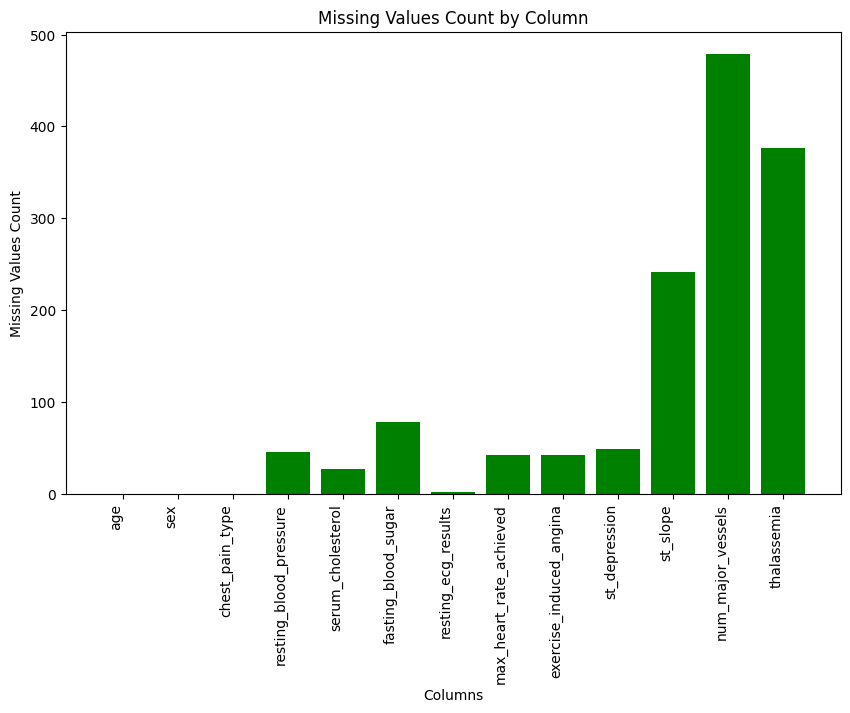

In [322]:
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='green')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count by Column')
plt.xticks(rotation=90, ha='right')
plt.show()

### <b>1.6 <span style='color:#B21010'>| </span>Handling with Missing Values </b>


In [323]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Define the column lists
numerical_cols = ['resting_blood_pressure', 'serum_cholesterol', 'thalach', 'st_depression', 'max_heart_rate_achieved']
categorical_cols = ['fasting_blood_sugar', 'resting_ecg_results', 'exercise_induced_angina']
drop_cols = ['st_slope', 'num_major_vessels', 'thalassemia', 'patient_id', 'place_of_study']

# Function to impute missing values
def impute_missing_values(X):
    X = X.copy()
    
    for col in numerical_cols:
        if col in X.columns:
            X[col] = X[col].fillna(X[col].median())  # Fill with median for numerical
    
    for col in categorical_cols:
        if col in X.columns:
            X[col] = X[col].fillna(X[col].mode()[0])  # Fill with mode for categorical
    
    return X

# Function to drop unnecessary columns
def drop_unnecessary_columns(X):
    return X.drop(columns=[col for col in drop_cols if col in X.columns], errors='ignore')
# Create the pipeline
df_pipeline = Pipeline([
    ('impute_missing_values', FunctionTransformer(impute_missing_values, validate=False)),
    ('drop_unnecessary_columns', FunctionTransformer(drop_unnecessary_columns, validate=False))
])

# Example: Applying the pipeline to a DataFrame
X_df = df_pipeline.fit_transform(X_df)

In [324]:
X_df

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression
0,53,Male,atypical angina,120.0,0.0,False,normal,95.0,False,0.0
1,74,Male,non-anginal,130.0,0.0,False,normal,140.0,False,0.5
2,53,Male,asymptomatic,130.0,0.0,False,lv hypertrophy,135.0,True,1.0
3,62,Male,asymptomatic,115.0,0.0,False,normal,72.0,True,-0.5
4,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0
...,...,...,...,...,...,...,...,...,...,...
731,45,Male,typical angina,110.0,264.0,False,normal,132.0,False,1.2
732,49,Female,asymptomatic,130.0,269.0,False,normal,163.0,False,0.0
733,54,Male,asymptomatic,124.0,266.0,False,lv hypertrophy,109.0,True,2.2
734,58,Female,typical angina,150.0,283.0,True,lv hypertrophy,162.0,False,1.0


In [325]:
# Validate data integrity
X_df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
serum_cholesterol          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
dtype: int64

In [326]:
X_df.describe()

,age,resting_blood_pressure,serum_cholesterol,max_heart_rate_achieved,st_depression
count,736.000000,736.000000,736.000000,736.000000,736.000000
mean,53.315217,131.702446,197.214674,137.861413,0.848234
std,9.427913,18.664741,109.654858,25.223730,1.056923
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.750000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000
75%,60.000000,140.000000,265.250000,155.250000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


# <b>2 <span style='color:#B21010'> || </span>Inquire regarding the dataset on cardiac ailments</b>

###  <b>2.1 <span style='color:#B21010'> | </span>What is the overall distribution of the target variable (presence of heart disease)?</b>


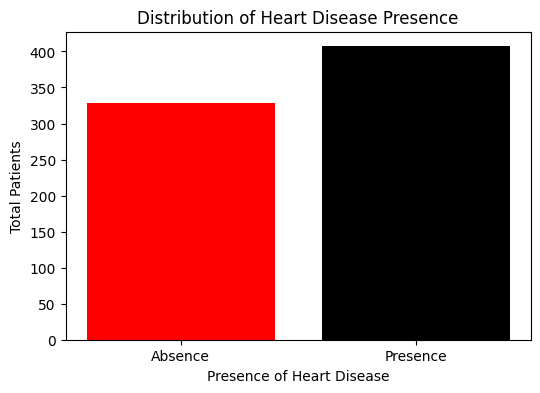

In [327]:
# Convert y to a Pandas Series if it's a NumPy array
y_series = pd.Series(y)

# Calculate the total absence and presence of heart disease
total_counts = y_series.value_counts()

# Ensure the correct indexing (0 for absence, 1 for presence)
total_absence = total_counts.get(0, 0)  # Get count for 0, default to 0 if missing
total_presence = total_counts.get(1, 0)  # Get count for 1, default to 0 if missing

# Plot the distribution of heart disease presence using a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Absence', 'Presence'], [total_absence, total_presence], color=['red', 'black'])
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Total Patients')
plt.show()


In [328]:
# Print the distribution of heart disease presence
print("Distribution of Heart Disease Presence:")
print("- Absence of Heart Disease:", total_absence, "patients")
print("- Presence of Heart Disease:", total_presence, "patients")

Distribution of Heart Disease Presence:
- Absence of Heart Disease: 329 patients
- Presence of Heart Disease: 407 patients



###  <b>2.2<span style='color:#B21010'> | </span>How does age distribute across the dataset, and what is its relationship with heart disease?</b>

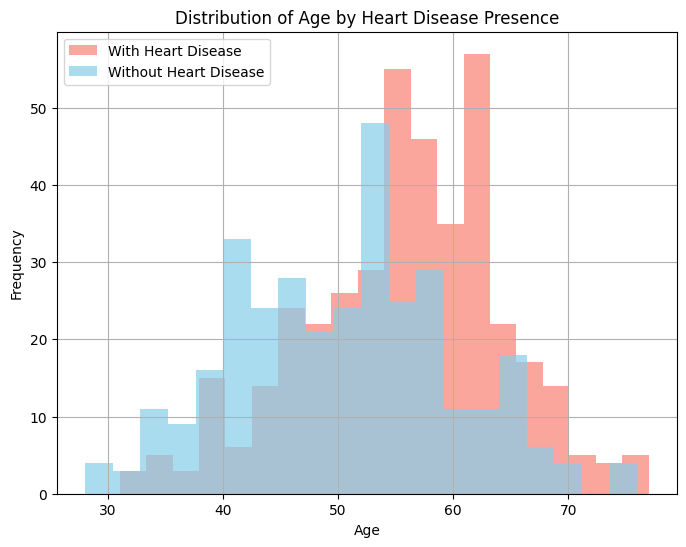

In [329]:
# Separate the dataset into patients with and without heart disease
age_with_disease = X_df[y_series == 1]['age']
age_without_disease = X_df[y_series == 0]['age']

# Plot the distribution of age for patients with and without heart disease
plt.figure(figsize=(8, 6))
plt.hist(age_with_disease, bins=20, color='salmon', alpha=0.7, label='With Heart Disease')
plt.hist(age_without_disease, bins=20, color='skyblue', alpha=0.7, label='Without Heart Disease')
plt.title('Distribution of Age by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [330]:
# Summary statistics for patients with heart disease
print("Patients with Heart Disease:")
print("- Mean Age:", round(age_with_disease.mean(), 2))
print("- Median Age:", age_with_disease.median())
print("- Standard Deviation:", round(age_with_disease.std(), 2))

# Summary statistics for patients without heart disease
print("\nPatients without Heart Disease:")
print("- Mean Age:", round(age_without_disease.mean(), 2))
print("- Median Age:", age_without_disease.median())
print("- Standard Deviation:", round(age_without_disease.std(), 2))

Patients with Heart Disease:
- Mean Age: 55.7
- Median Age: 57.0
- Standard Deviation: 8.75

Patients without Heart Disease:
- Mean Age: 50.37
- Median Age: 51.0
- Standard Deviation: 9.42


###  <b>2.3 <span style='color:#B21010'> | </span>What is the distribution of resting blood pressure (trestbps) among patients with and without heart disease?</b>

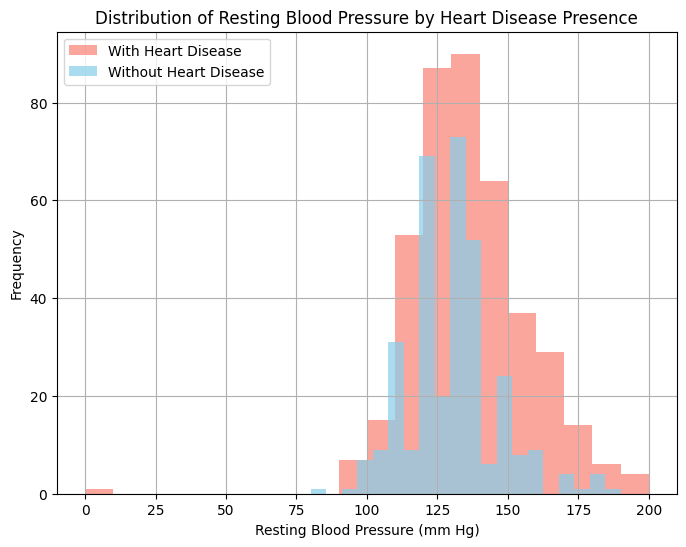

In [331]:
# Separate the dataset into patients with and without heart disease
resting_blood_pressure_with_disease = X_df[y_series == 1]['resting_blood_pressure']
resting_blood_pressure_without_disease = X_df[y_series == 0]['resting_blood_pressure']

# Plot the distribution of resting blood pressure for patients with and without heart disease
plt.figure(figsize=(8, 6))
plt.hist(resting_blood_pressure_with_disease, bins=20, color='salmon', alpha=0.7, label='With Heart Disease')
plt.hist(resting_blood_pressure_without_disease, bins=20, color='skyblue', alpha=0.7, label='Without Heart Disease')
plt.title('Distribution of Resting Blood Pressure by Heart Disease Presence')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [332]:
# Summary statistics for resting blood pressure among patients with heart disease
print("Resting Blood Pressure (mm Hg) - Patients with Heart Disease:")
print("- Mean:", round(resting_blood_pressure_with_disease.mean(), 2))
print("- Median:", resting_blood_pressure_with_disease.median())
print("- Standard Deviation:", round(resting_blood_pressure_with_disease.std(), 2))

# Summary statistics for resting blood pressure among patients without heart disease
print("\nResting Blood Pressure (mm Hg) - Patients without Heart Disease:")
print("- Mean:", round(resting_blood_pressure_without_disease.mean(), 2))
print("- Median:", resting_blood_pressure_without_disease.median())
print("- Standard Deviation:", round(resting_blood_pressure_without_disease.std(), 2))

Resting Blood Pressure (mm Hg) - Patients with Heart Disease:
- Mean: 133.19
- Median: 130.0
- Standard Deviation: 20.25

Resting Blood Pressure (mm Hg) - Patients without Heart Disease:
- Mean: 129.86
- Median: 130.0
- Standard Deviation: 16.33



###  <b>2.4<span style='color:#B21010'> | </span> Are there any notable differences in serum cholesterol (chol) levels between patients with and without heart disease?</b>

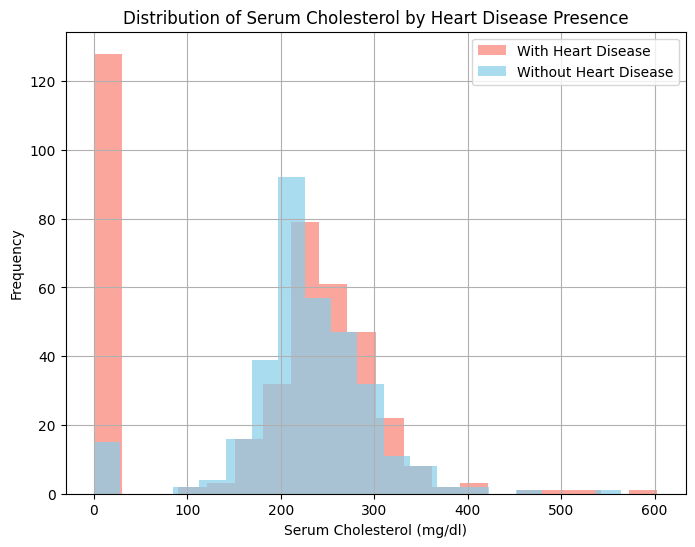

In [333]:
# Separate the dataset into patients with and without heart disease
cholesterol_with_disease = X_df[y_series == 1]['serum_cholesterol']
cholesterol_without_disease = X_df[y_series == 0]['serum_cholesterol']

# Plot the distribution of serum cholesterol levels for patients with and without heart disease
plt.figure(figsize=(8, 6))
plt.hist(cholesterol_with_disease, bins=20, color='salmon', alpha=0.7, label='With Heart Disease')
plt.hist(cholesterol_without_disease, bins=20, color='skyblue', alpha=0.7, label='Without Heart Disease')
plt.title('Distribution of Serum Cholesterol by Heart Disease Presence')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [334]:
# Summary statistics for serum cholesterol levels among patients with heart disease
print("Serum Cholesterol (mg/dl) - Patients with Heart Disease:")
print("- Mean:", round(cholesterol_with_disease.mean(), 2))
print("- Median:", cholesterol_with_disease.median())
print("- Standard Deviation:", round(cholesterol_with_disease.std(), 2))

# Summary statistics for serum cholesterol levels among patients without heart disease
print("\nSerum Cholesterol (mg/dl) - Patients without Heart Disease:")
print("- Mean:", round(cholesterol_without_disease.mean(), 2))
print("- Median:", cholesterol_without_disease.median())
print("- Standard Deviation:", round(cholesterol_without_disease.std(), 2))

Serum Cholesterol (mg/dl) - Patients with Heart Disease:
- Mean: 172.54
- Median: 219.0
- Standard Deviation: 126.69

Serum Cholesterol (mg/dl) - Patients without Heart Disease:
- Mean: 227.74
- Median: 224.0
- Standard Deviation: 73.38


###  <b>2.5  <span style='color:#B21010'> | </span>How does the distribution of maximum heart rate achieved (thalach) vary based on the presence of heart disease?</b>


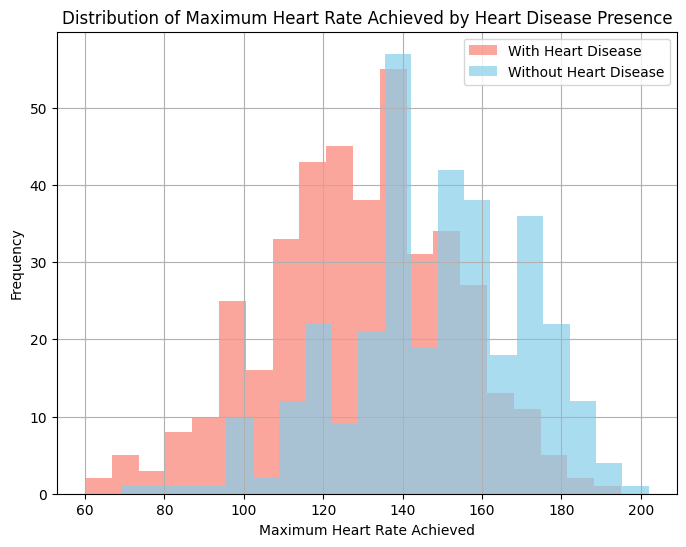

In [335]:
# Separate the dataset into patients with and without heart disease
thalach_with_disease = X_df[y_series == 1]['max_heart_rate_achieved']
thalach_without_disease = X_df[y_series == 0]['max_heart_rate_achieved']

# Plot the distribution of maximum heart rate achieved for patients with and without heart disease
plt.figure(figsize=(8, 6))
plt.hist(thalach_with_disease, bins=20, color='salmon', alpha=0.7, label='With Heart Disease')
plt.hist(thalach_without_disease, bins=20, color='skyblue', alpha=0.7, label='Without Heart Disease')
plt.title('Distribution of Maximum Heart Rate Achieved by Heart Disease Presence')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [336]:
# Summary statistics for maximum heart rate achieved among patients with heart disease
print("Maximum Heart Rate Achieved - Patients with Heart Disease:")
print("- Mean:", round(thalach_with_disease.mean(), 2))
print("- Median:", thalach_with_disease.median())
print("- Standard Deviation:", round(thalach_with_disease.std(), 2))

# Summary statistics for maximum heart rate achieved among patients without heart disease
print("\nMaximum Heart Rate Achieved - Patients without Heart Disease:")
print("- Mean:", round(thalach_without_disease.mean(), 2))
print("- Median:", thalach_without_disease.median())
print("- Standard Deviation:", round(thalach_without_disease.std(), 2))


Maximum Heart Rate Achieved - Patients with Heart Disease:
- Mean: 129.18
- Median: 130.0
- Standard Deviation: 23.51

Maximum Heart Rate Achieved - Patients without Heart Disease:
- Mean: 148.6
- Median: 150.0
- Standard Deviation: 23.07



###  <b>2.6 <span style='color:#B21010'> | </span>What is the prevalence of different types of chest pain (cp) among patients in the dataset?</b>

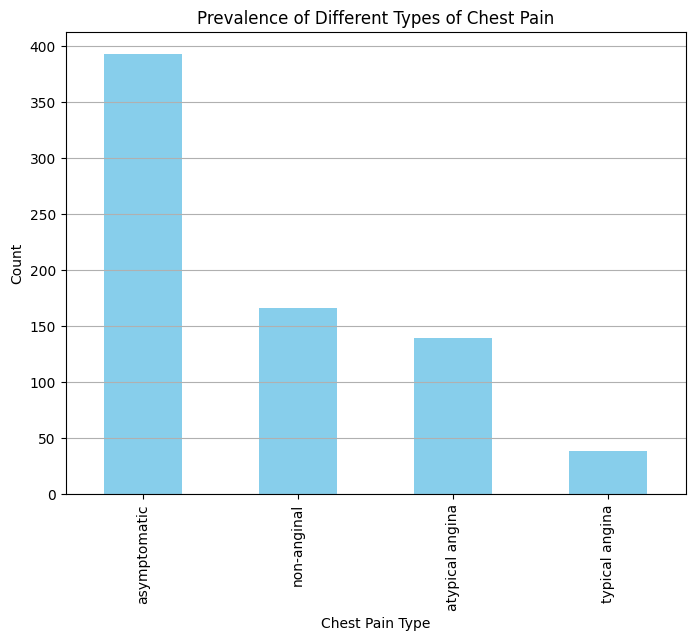

Prevalence of Different Types of Chest Pain:
- asymptomatic: 393 patients
- non-anginal: 166 patients
- atypical angina: 139 patients
- typical angina: 38 patients


In [337]:
# Count the occurrences of each chest pain type
chest_pain_counts = X_df['chest_pain_type'].value_counts()

# Plot the prevalence of different types of chest pain
plt.figure(figsize=(8, 6))
chest_pain_counts.plot(kind='bar', color='skyblue')
plt.title('Prevalence of Different Types of Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on the y-axis
plt.show()

# Print the counts of each chest pain type
print("Prevalence of Different Types of Chest Pain:")
for cp_type, count in chest_pain_counts.items():
    print(f"- {cp_type}: {count} patients")



###  <b>2.7 <span style='color:#B21010'> | </span>Is there a significant difference in the occurrence of heart disease between males and females?</b> 

In [338]:
# Create a contingency table for heart disease occurrence by sex
contingency_table = pd.crosstab(X_df['sex'], y_series)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("\nChi-square Test Statistics:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Determine significance based on the p-value
alpha = 0.05
if p < alpha:
    print("\nThere is a significant difference in the occurrence of heart disease between males and females.")
else:
    print("\nThe occurrence of heart disease does not significantly differ between males and females.")


Contingency Table:
col_0     0    1
sex             
Female  117   45
Male    212  362

Chi-square Test Statistics:
Chi-square value: 62.22758230744988
P-value: 3.0597225591539864e-15

There is a significant difference in the occurrence of heart disease between males and females.


###  <b>2.8 <span style='color:#B21010'> | </span>How does the presence of exercise-induced angina (exang) relate to heart disease?</b>


In [339]:
# Create a contingency table for heart disease presence by exercise-induced angina
contingency_table = pd.crosstab(X_df['sex'], y_series)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("\nChi-square Test Statistics:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Determine significance based on the p-value
alpha = 0.05
if p < alpha:
    print("\nThere is a significant relationship between the presence of exercise-induced angina and heart disease.")
else:
    print("\nThere is no significant relationship between the presence of exercise-induced angina and heart disease.")


Contingency Table:
col_0     0    1
sex             
Female  117   45
Male    212  362

Chi-square Test Statistics:
Chi-square value: 62.22758230744988
P-value: 3.0597225591539864e-15

There is a significant relationship between the presence of exercise-induced angina and heart disease.


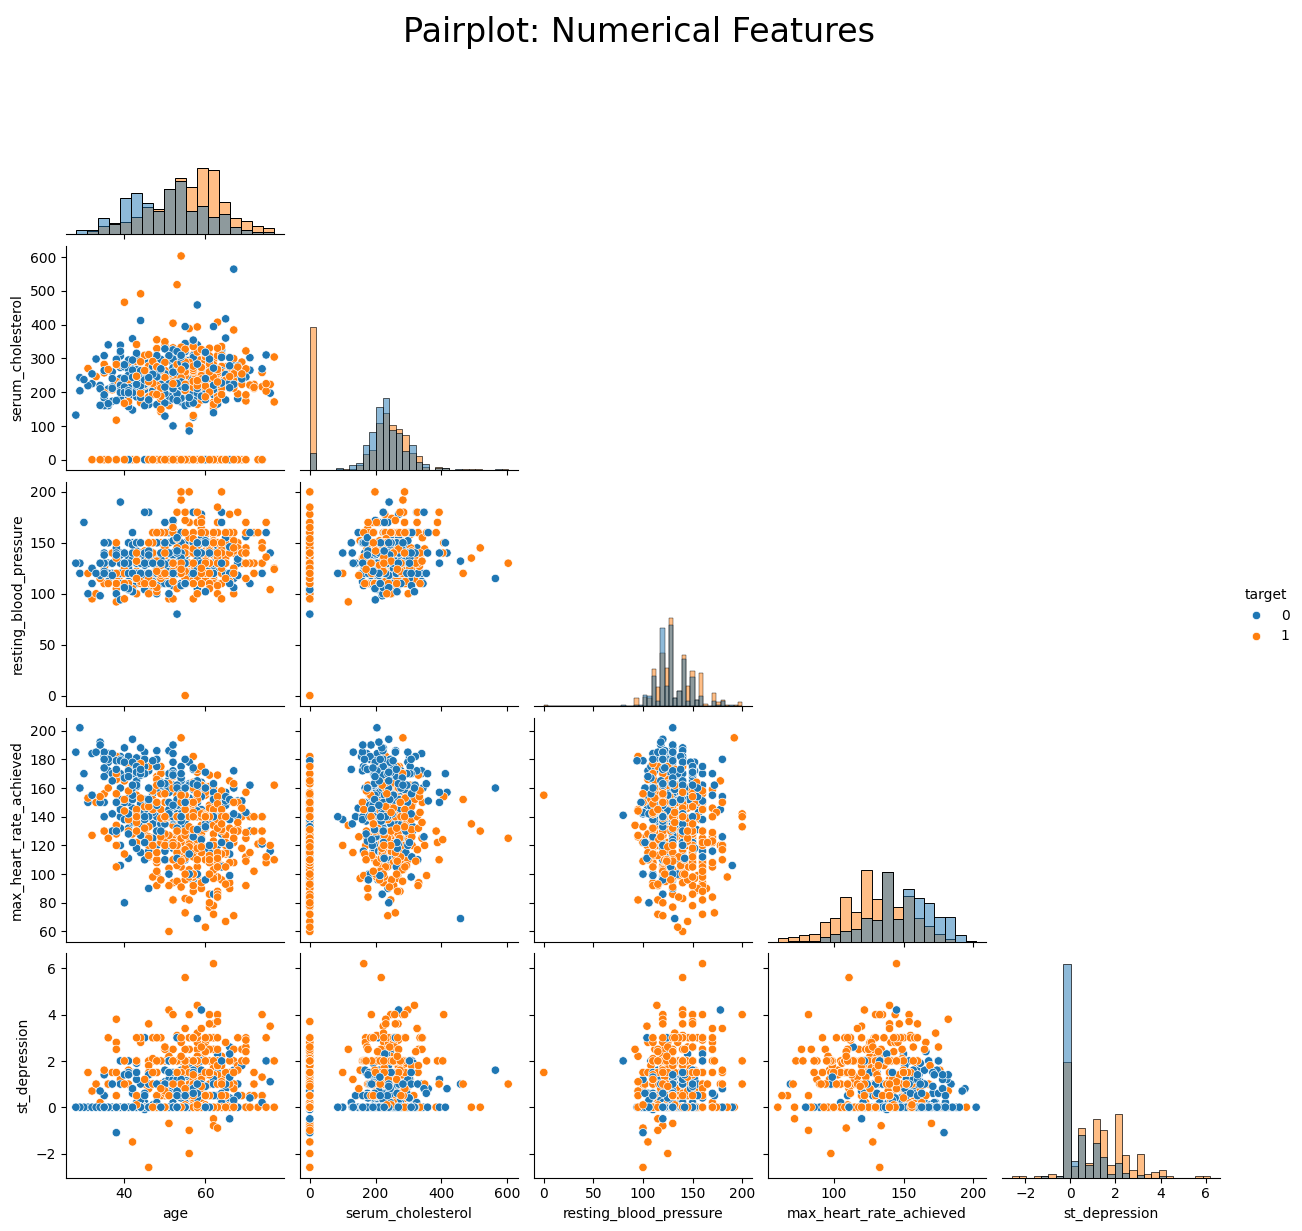

In [340]:
train_data = X_df.copy()
train_data["target"] = y_series  # AutoGluon requires the target column inside training data

_ = ['age', 'serum_cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression','target']
data_ = train_data[_]
g = sns.pairplot(data_,hue='target', corner=True, diag_kind='hist');
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

# <b>3 <span style='color:#B21010'>||</span> Submission</b>

The goal of the RAMP is to classify the patients into categories: with and without heart disease.

In [341]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from lightgbm import LGBMClassifier
import pandas as pd

# Column renaming mapping
column_mapping = {
    'id': 'patient_id',
    'age': 'age',
    'sex': 'sex',
    'dataset': 'place_of_study',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg_results',
    'thalch': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'num': 'heart_disease_presence'
}

# Columns to drop
drop_cols = ['st_slope', 'num_major_vessels', 'thalassemia', 'patient_id', 'place_of_study']

# Function to rename columns
def rename_columns(X):
    return X.rename(columns=column_mapping)

# Function to drop unnecessary columns
def drop_unnecessary_columns(X):
    return X.drop(columns=[col for col in drop_cols if col in X.columns], errors='ignore')

# Define feature columns
numeric_cols = ['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate_achieved', 'st_depression']
categorical_cols = ['sex', 'chest_pain_type', 'resting_ecg_results', 'exercise_induced_angina']

# Define transformers
rename_transformer = FunctionTransformer(rename_columns, validate=False)
drop_columns_transformer = FunctionTransformer(drop_unnecessary_columns, validate=False)

# Define column transformer for preprocessing
column_transformer = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numeric_cols),
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse_output=False)), categorical_cols),
    remainder='passthrough'
)

# Define pipeline
def get_estimator():
    return make_pipeline(
        rename_transformer,  # Rename columns
        drop_columns_transformer,  # Drop unnecessary columns
        column_transformer,  # Transform numerical & categorical columns
        LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=60)  # LightGBM Classifier
    )


# <b>4 <span style='color:#B21010'>||</span> Testing using a scikit-learn pipeline</b>

In [342]:
import problem
from sklearn.model_selection import cross_val_score

X_df, y = problem.get_train_data()
X_df.head()
scores = cross_val_score(get_estimator(), X_df, y, cv=2, scoring='accuracy')
print(scores)

[0.79347826 0.77173913]
